# BibRec: Training Random Forest Model

### Features used: Country, State, Age, Year-of-Publication, Publisher

In [ ]:
# Specify where to save the model
model_file = "data/rf-model.pkl"

In [2]:
from bibrec.server.Utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

books, users, ratings = get_normalized_data(books_path='data/normalized_books.csv',
                                            users_path='data/normalized_users.csv',
                                            ratings_path='data/normalized_ratings.csv')


books = books.drop(["isbn"], axis=1)
ratings = ratings.drop(["isbn"], axis=1)

/Dev/repos/FH-SBG/MMT1/RES/recommender-systems/bibrec/server/Utils.py:391: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv(ratings_path, sep=",", encoding="utf-8", na_filter=False)


In [3]:
users

,user_id,age,city,state,country,user_mean,user_count
0,1,33.722536,nyc,new_york,usa,0.00,0.0
1,2,18.000000,stockton,california,usa,0.00,1.0
2,3,33.030485,moscow,other,other,0.00,0.0
3,4,17.000000,porto,other,portugal,0.00,0.0
4,5,59.370940,farnborough,other,united_kingdom,0.00,0.0
...,...,...,...,...,...,...,...
278853,278854,24.872503,portland,oregon,usa,5.25,8.0
278854,278855,50.000000,tacoma,washington,united_kingdom,0.00,0.0
278855,278856,47.469696,brampton,ontario,canada,0.00,0.0
278856,278857,36.158853,knoxville,other,usa,0.00,0.0


In [4]:
books

,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication
0,Classical Mythology,Mark P. O. Morford,2002,other,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,1.0,3
1,Clara Callan,Richard Bruce Wright,2001,other,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,4.928571,14.0,4
2,Decision in Normandy,Carlo D'Este,1991,other,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,5.000000,3.0,14
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,other,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,4.272727,11.0,6
4,The Mummies of Urumchi,E. J. W. Barber,1999,other,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,other,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17
270940,From One to One Hundred,Teri Sloat,1991,other,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,other,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,1.0,1
270942,Republic (World's Classics),Plato,1996,other,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,1.0,9


In [5]:
ratings

,user_id,book_rating,isbn13,normalized_rating
0,276726,5,9780155061224,-1.5
1,276729,3,9780521656153,0.0
2,276729,6,9780521795029,4.0
3,276744,7,9780385501200,2.0
4,276747,9,9780060517793,4.6
...,...,...,...,...
383957,276704,7,9780743211383,
383958,276704,5,9780806917696,
383959,276704,9,9781563526299,
383960,276709,10,9780515107661,


In [6]:
encoded_books = hot_encode_books(books)
encoded_books

hot encoding books


,book_title,book_author,year_of_publication,image_url_s,image_url_m,image_url_l,isbn13,rating_mean,rating_count,normalized_year_of_publication,...,publisher_random_house_inc,publisher_scholastic,publisher_signet_book,publisher_silhouette,publisher_simon_&amp;_schuster,publisher_st._martin's_press,publisher_st_martins_pr,publisher_tor_books,publisher_warner_books,publisher_zebra_books
0,Classical Mythology,Mark P. O. Morford,2002,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,9780195153446,0.000000,1.0,3,...,0,0,0,0,0,0,0,0,0,0
1,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,9780002005012,4.928571,14.0,4,...,0,0,0,0,0,0,0,0,0,0
2,Decision in Normandy,Carlo D'Este,1991,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,9780060973124,5.000000,3.0,14,...,0,0,0,0,0,0,0,0,0,0
3,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,9780374157067,4.272727,11.0,6,...,0,0,0,0,0,0,0,0,0,0
4,The Mummies of Urumchi,E. J. W. Barber,1999,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,9780393045215,0.000000,1.0,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,There's a Bat in Bunk Five,Paula Danziger,1988,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,978044040095,7.000000,1.0,17,...,0,0,0,0,0,0,0,0,0,0
270940,From One to One Hundred,Teri Sloat,1991,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,978052544763,4.000000,1.0,14,...,0,0,0,0,0,0,0,0,0,0
270941,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,9780060086671,0.000000,1.0,1,...,0,0,0,0,0,0,0,0,0,0
270942,Republic (World's Classics),Plato,1996,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,9780192126047,0.000000,1.0,9,...,0,0,0,0,0,0,0,0,0,0


In [7]:
encoded_users = hot_encode_users(users)
encoded_users

,user_id,age,city,user_mean,user_count,country_argentina,country_australia,country_austria,country_brazil,country_canada,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,1,33.722536,nyc,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.000000,stockton,0.00,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,33.030485,moscow,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,17.000000,porto,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,59.370940,farnborough,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,24.872503,portland,5.25,8.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
278854,278855,50.000000,tacoma,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278855,278856,47.469696,brampton,0.00,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
278856,278857,36.158853,knoxville,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
encoded_books.to_csv('data/encoded_books.csv')
encoded_users.to_csv('data/encoded_users.csv')

In [9]:
# RF Features: Country, State, Age, Year-of-Publication, Publisher
df_books = encoded_books.filter(regex="isbn13|normalized_year_of_publication|publisher_", axis=1)
df_books

,isbn13,normalized_year_of_publication,publisher_ballantine_books,publisher_bantam_books,publisher_berkley_publishing_group,publisher_fawcett_books,publisher_harlequin,publisher_harpercollins,publisher_harpercollins_publishers,publisher_other,...,publisher_random_house_inc,publisher_scholastic,publisher_signet_book,publisher_silhouette,publisher_simon_&amp;_schuster,publisher_st._martin's_press,publisher_st_martins_pr,publisher_tor_books,publisher_warner_books,publisher_zebra_books
0,9780195153446,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,9780002005012,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9780060973124,14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9780374157067,6,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9780393045215,6,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270939,978044040095,17,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270940,978052544763,14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270941,9780060086671,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270942,9780192126047,9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_users = encoded_users.filter(regex="user_id|age|country_|state_", axis=1)
df_users

,user_id,age,country_argentina,country_australia,country_austria,country_brazil,country_canada,country_china,country_france,country_germany,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,1,33.722536,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,33.030485,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,17.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,59.370940,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278853,278854,24.872503,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
278854,278855,50.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
278855,278856,47.469696,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
278856,278857,36.158853,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
df_ratings = ratings.filter(regex="isbn13|user_id|book_rating", axis=1)
df_ratings

,user_id,book_rating,isbn13
0,276726,5,9780155061224
1,276729,3,9780521656153
2,276729,6,9780521795029
3,276744,7,9780385501200
4,276747,9,9780060517793
...,...,...,...
383957,276704,7,9780743211383
383958,276704,5,9780806917696
383959,276704,9,9781563526299
383960,276709,10,9780515107661


In [12]:
df = df_ratings
df = df.merge(df_books, on="isbn13", how="left")
df = df.merge(df_users, on="user_id", how="left")
df

,user_id,book_rating,isbn13,normalized_year_of_publication,publisher_ballantine_books,publisher_bantam_books,publisher_berkley_publishing_group,publisher_fawcett_books,publisher_harlequin,publisher_harpercollins,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,276726,5,9780155061224,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,276729,3,9780521656153,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,276729,6,9780521795029,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,276744,7,9780385501200,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,276747,9,9780060517793,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383963,276704,7,9780743211383,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
383964,276704,5,9780806917696,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
383965,276704,9,9781563526299,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
383966,276709,10,9780515107661,9,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
# Features
# X = df.drop(['user_id', 'isbn13', 'book_rating'], axis=1)
X = df.drop(['user_id', 'book_rating'], axis=1)
# Prediction
Y = df['book_rating']

In [14]:
X

,isbn13,normalized_year_of_publication,publisher_ballantine_books,publisher_bantam_books,publisher_berkley_publishing_group,publisher_fawcett_books,publisher_harlequin,publisher_harpercollins,publisher_harpercollins_publishers,publisher_other,...,state_nordrhein-westfalen,state_north_carolina,state_ohio,state_ontario,state_oregon,state_other,state_pennsylvania,state_texas,state_virginia,state_washington
0,9780155061224,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,9780521656153,6,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9780521795029,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9780385501200,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9780060517793,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383963,9780743211383,4,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
383964,9780806917696,8,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
383965,9781563526299,5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
383966,9780515107661,9,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [15]:
Y

0          5
1          3
2          6
3          7
4          9
          ..
383963     7
383964     5
383965     9
383966    10
383967    10
Name: book_rating, Length: 383968, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

In [21]:
if exists(model_file):
    rfc = get_model(model_file)
else:
    print("Creating new Classifier")
    rfc = RandomForestClassifier(n_estimators=100, min_weight_fraction_leaf=0, n_jobs=3, random_state=1, verbose=10)
    # save file
    # dump_object(MODEL_FILE_PKL, rfc):

Creating new Classifier


In [23]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.6s


building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    1.8s


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.5s


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    4.3s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    5.5s


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    7.4s


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    9.3s


building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100


[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:   11.6s


building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100


[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:   13.7s


building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100


[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:   16.3s


building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100


[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:   18.8s


building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:   20.4s finished


RandomForestClassifier(min_weight_fraction_leaf=0, n_jobs=3, random_state=1,
                       verbose=10)

In [24]:
rfc_pred = rfc.predict(X_test)
rfc_pred

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    1.0s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.2s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    2.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    2.5s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    2.7s finished


array([9, 5, 6, ..., 9, 9, 6])

In [25]:
print(classification_report(y_test, rfc_pred))
print(accuracy_score(y_test, rfc_pred) * 100)

              precision    recall  f1-score   support

           1       0.04      0.02      0.03       447
           2       0.03      0.02      0.02       720
           3       0.03      0.02      0.03      1480
           4       0.05      0.03      0.04      2267
           5       0.27      0.25      0.26     13594
           6       0.12      0.09      0.11      9300
           7       0.21      0.21      0.21     19975
           8       0.28      0.32      0.30     27593
           9       0.22      0.21      0.22     18313
          10       0.31      0.33      0.32     21502

    accuracy                           0.25    115191
   macro avg       0.16      0.15      0.15    115191
weighted avg       0.24      0.25      0.24    115191

24.70418695905062


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.6s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    1.6s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    1.8s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    2.2s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    2.5s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


Confusion matrix, without normalization
[[  11    8    9   16   53   38   74  102   58   78]
 [   7   11   10   17   89   56  135  191   93  111]
 [   3   18   31   31  169  109  319  367  197  236]
 [  10   16   33   77  229  185  392  641  301  383]
 [  33   46   98  171 3343  876 2153 3281 1587 2006]
 [  19   38   75  134  956  882 1893 2643 1236 1424]
 [  35   66  154  288 1848 1447 4220 5833 2880 3204]
 [  60   94  193  314 2330 1733 5010 8889 4341 4629]
 [  24   48  132  199 1419 1056 2901 5100 3875 3559]
 [  44   63  153  194 1784 1099 2898 5042 3107 7118]]


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    0.9s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.1s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    2.1s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    2.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    2.6s finished


Normalized confusion matrix
[[0.02 0.02 0.02 0.04 0.12 0.09 0.17 0.23 0.13 0.17]
 [0.01 0.02 0.01 0.02 0.12 0.08 0.19 0.27 0.13 0.15]
 [0.   0.01 0.02 0.02 0.11 0.07 0.22 0.25 0.13 0.16]
 [0.   0.01 0.01 0.03 0.1  0.08 0.17 0.28 0.13 0.17]
 [0.   0.   0.01 0.01 0.25 0.06 0.16 0.24 0.12 0.15]
 [0.   0.   0.01 0.01 0.1  0.09 0.2  0.28 0.13 0.15]
 [0.   0.   0.01 0.01 0.09 0.07 0.21 0.29 0.14 0.16]
 [0.   0.   0.01 0.01 0.08 0.06 0.18 0.32 0.16 0.17]
 [0.   0.   0.01 0.01 0.08 0.06 0.16 0.28 0.21 0.19]
 [0.   0.   0.01 0.01 0.08 0.05 0.13 0.23 0.14 0.33]]


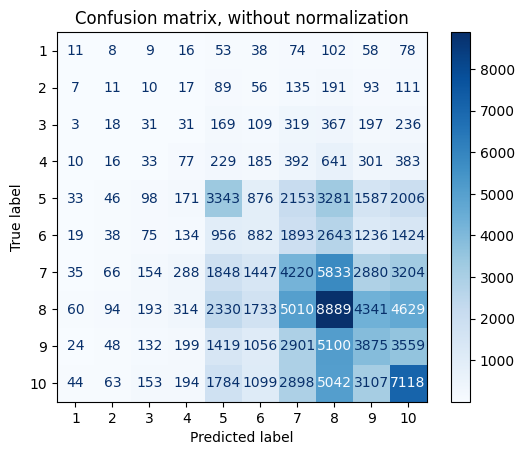

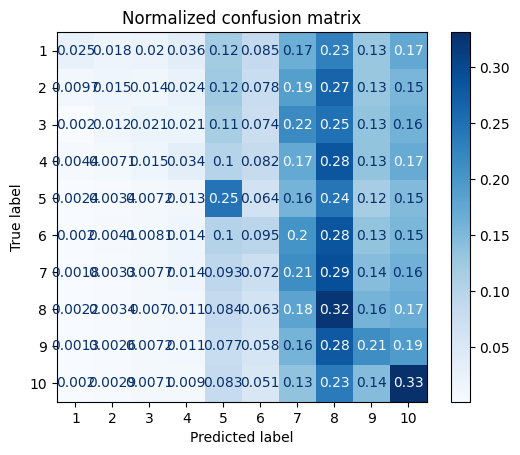

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

classifier = rfc

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        # display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [27]:
rfc.score(X_train, y_train)

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:    0.5s
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    0.8s
[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    1.7s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:    2.2s
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    2.8s
[Parallel(n_jobs=3)]: Done  55 tasks      | elapsed:    3.5s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:    4.2s
[Parallel(n_jobs=3)]: Done  79 tasks      | elapsed:    5.0s
[Parallel(n_jobs=3)]: Done  92 tasks      | elapsed:    5.7s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    6.2s finished


0.9016098847743669

In [28]:
feature_importance = pd.DataFrame({'Feature_names': X.columns, 'Importances': rfc.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importances', ascending=False)
feature_importance

,Feature_names,Importances
23,age,0.407533
0,isbn13,0.326546
1,normalized_year_of_publication,0.191425
61,state_other,0.003686
9,publisher_other,0.003298
...,...,...
27,country_brazil,0.000272
56,state_nordrhein-westfalen,0.000210
29,country_china,0.000199
24,country_argentina,0.000131


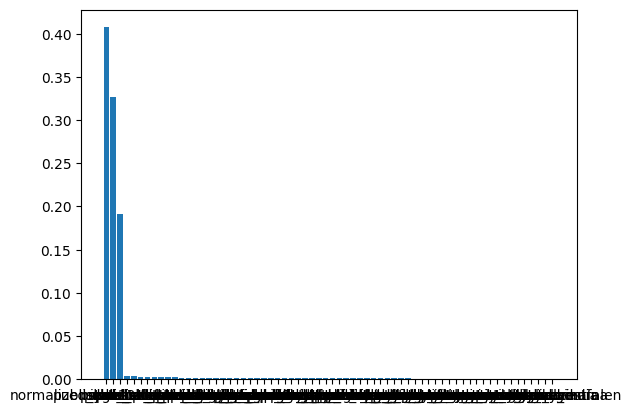

In [29]:
plt.bar(feature_importance['Feature_names'], feature_importance['Importances'])
plt.show()

In [30]:
country_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^country", regex=True)]
country_importance

,Feature_names,Importances
44,country_usa,0.001671
37,country_other,0.001404
43,country_united_kingdom,0.001041
28,country_canada,0.000992
31,country_germany,0.000776
25,country_australia,0.000609
30,country_france,0.000584
34,country_malaysia,0.000558
40,country_spain,0.000538
36,country_new_zealand,0.000506


In [31]:
state_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^state", regex=True)]
state_importance

,Feature_names,Importances
61,state_other,0.003686
47,state_california,0.002709
63,state_texas,0.002085
55,state_new_york,0.001914
50,state_illinois,0.001796
64,state_virginia,0.001771
52,state_michigan,0.001691
49,state_florida,0.001666
57,state_north_carolina,0.001659
53,state_missouri,0.001653


In [32]:
publisher_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("^publisher", regex=True)]
publisher_importance

,Feature_names,Importances
9,publisher_other,0.003298
2,publisher_ballantine_books,0.002314
12,publisher_pocket,0.002089
21,publisher_warner_books,0.001989
3,publisher_bantam_books,0.001814
15,publisher_signet_book,0.001673
10,publisher_penguin_books,0.001649
7,publisher_harpercollins,0.001598
17,publisher_simon_&amp;_schuster,0.001504
4,publisher_berkley_publishing_group,0.001266


In [33]:
age_importance = feature_importance.loc[lambda x: x['Feature_names'].str.contains("age", regex=True)]["Importances"]
print("age:", age_importance)
print("country_importance:", country_importance["Importances"].sum())
print("state_importance:", state_importance["Importances"].sum())
print("publisher_importance:", publisher_importance["Importances"].sum())

age: 23    0.407533
Name: Importances, dtype: float64
country_importance: 0.01221868988007834
state_importance: 0.03223923905809853
publisher_importance: 0.03003803875310926
